In [20]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from random import randrange
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
with open("sample.json", 'r') as f:
    sample = json.load(f)

In [22]:
len(sample)

2500

In [23]:
DF = pd.DataFrame(sample)
DF.set_index('ID')
DF.head()

,ID,age,date_out,date_return,foreign_address,fund2invest,gender,home_address,interest,personal_view,profession,remittance,social_work,travell
0,TZ89CK45CP,44,2018.2.26,2019.1.13,"{'country': 'Seychelles', 'ID': 'SC', 'lat': '...","{'invetsment sector': '1%', 'tourism and hospi...",female,"{'province': 'PN2', 'district': 'Saptari', 'MC...",travel,[A day after the Panama Papers were exposed in...,"{'major': 'Life, Physical, and Social Science ...","[{'month': 10, 'amount': 676}, {'month': 4, 'a...","[{'date': '2001.5.2', 'work': 'donation for sc...","[{'date': '2016.3.27', 'place': {'country': 'T..."
1,D3G4EILJ48,49,2010.10.7,2020.6.1,"{'country': 'Norfolk-Island', 'ID': 'NF', 'lat...","{'invetsment sector': '10%', 'tourism and hosp...",female,"{'province': 'PN5', 'district': 'Arghakhanchi'...",teaching,"[In response to the pressure, Parliament devis...",{'major': 'Computer and Mathematical Occupatio...,"[{'month': 2, 'amount': 398}, {'month': 7, 'am...","[{'date': '2003.2.18', 'work': 'charity events...","[{'date': '2019.1.21', 'place': {'country': 'R..."
2,LU4G6L54GG,46,2019.5.17,2033.9.8,"{'country': 'Saint-Lucia', 'ID': 'LC', 'lat': ...","{'invetsment sector': '9%', 'tourism and hospi...",male,"{'province': 'PN6', 'district': 'Humla', 'MCP'...",art,"[To add to the erroneous logic, Kathmandu Metr...",{'major': 'Business and Financial Operations O...,"[{'month': 8, 'amount': 472}, {'month': 4, 'am...","[{'date': '2017.10.1', 'work': 'helping old pe...","[{'date': '2014.4.24', 'place': {'country': 'C..."
3,PPTYX7GV58,31,2012.4.3,2032.2.24,"{'country': 'Belarus', 'ID': 'BY', 'lat': '53....","{'invetsment sector': '8%', 'tourism and hospi...",female,"{'province': 'PN2', 'district': 'Bara', 'MCP':...",business,"[Yet, having said that, the companies cannot o...","{'major': 'Healthcare Support Occupations', 'b...","[{'month': 4, 'amount': 866}, {'month': 1, 'am...","[{'date': '2008.2.11', 'work': 'medical camp'}...","[{'date': '2018.1.28', 'place': {'country': 'N..."
4,Z3X1819EMU,26,2010.10.14,2034.1.3,"{'country': 'Botswana', 'ID': 'BW', 'lat': '-2...","{'invetsment sector': '6%', 'tourism and hospi...",male,"{'province': 'PN4', 'district': 'Kaski', 'MCP'...",history,"[To add to the erroneous logic, Kathmandu Metr...",{'major': 'Community and Social Service Occupa...,"[{'month': 2, 'amount': 849}, {'month': 6, 'am...","[{'date': '2002.5.3', 'work': 'child orphanage...","[{'date': '2013.4.13', 'place': {'country': 'A..."


In [24]:
 def split_date(list):
    Tot_Month=[]
    for i in range(len(DF)):
        MM=int(list[i].split('.')[0])*12+int(list[i].split('.')[1])
        Tot_Month.append(MM)
    return (Tot_Month)
        
A=split_date(DF['date_out'])
B=split_date(DF['date_return'])
Month_Out=([m - n for m,n in zip(B,A)])

#Function to calculate histogram bin size
def histbin(a,b,step):
    bigbinn=[]
    for i in np.arange(a,b,step):
        bigbinn.append(i)
    return (bigbinn)

In [25]:
Data = []
k = 0
points=len(sample)
for item in sample:
    #print(item.values()) 
    ID = item['ID']
    age = item['age']
    gender=item['gender']
    date_out=item['date_out']
    date_return=item['date_return']
    country = item['foreign_address']['country']
    c_code = item['foreign_address']['ID']
    lat = item['foreign_address']['lat']
    long=item['foreign_address']['lon']
    city=item['foreign_address']['city']
    province=item['home_address']['province']
    district=item['home_address']['district']
    MCP_RM=item['home_address']['MCP']
    Ward=item['home_address']['ward']
    Fund2Invest=item['fund2invest']['total_fund']
    Invest_sector=item['fund2invest']['invetsment sector']
    Tourism=item['fund2invest']['tourism and hospitality']
    Animal_Husbandry=item['fund2invest']['animal husbandary']
    Infrastructure=item['fund2invest']['infrastructure']
    Cottage_Ind=item['fund2invest']['cottage industries']
    Prsnl_Busns_Svr=item['fund2invest']['personal service business']
    Retail=item['fund2invest']['retail business']
    Consultancy=item['fund2invest']['consultancy service']
    Alter_energy=item['fund2invest']['alternative energy']
    Agriculture=item['fund2invest']['agriculture']
    Interests=item['interest']
    income = 0
    for t in item['remittance']:
        income = income+t['amount']
        
    
    Data.append({'ID': ID, "age":age,\
                "country": country,\
                 "c_code":c_code, "long":long,\
                "lat": lat, "city":city,\
                 "province":province,\
                 "district":district,"MCP_RM":MCP_RM,\
                 "Ward":Ward,"Interests":Interests,\
                 "Fund2Invest":Fund2Invest,\
                 "Invest_sector":Invest_sector,\
                 "Tourism":Tourism, "Animal_Husbandry":Animal_Husbandry,\
                 "Infrastructure":Infrastructure,\
                 "Cottage_Ind":Cottage_Ind,"Prsnl_Busns_Svr":Prsnl_Busns_Svr,\
                 "Retail":Retail, "Consultancy":Consultancy,\
                 "Alter_energy":Alter_energy, "Agriculture":Agriculture,
                 "Date_out":date_out, "Date_return":date_return,\
                 "gender":gender,"income": income
                 })
    k +=k
    if k> points:
        break
##Program to Split dates for calculating difference in month.
Data=pd.DataFrame(Data)
Data['Months_Out']= Month_Out

In [26]:
WD=pd.DataFrame(Data,columns=['ID','age','gender','income','Date_out','Date_return','Months_Out','Fund2Invest','Agriculture', 'Alter_energy', 'Animal_Husbandry', 'Consultancy',
       'Cottage_Ind',   'Infrastructure', 'Invest_sector',
        'Prsnl_Busns_Svr', 'Retail', 'Tourism',  'country',
       'c_code', 'city', 'lat', 'long','Interests', 'province','district','MCP_RM','Ward',])
WD.head()

,ID,age,gender,income,Date_out,Date_return,Months_Out,Fund2Invest,Agriculture,Alter_energy,...,country,c_code,city,lat,long,Interests,province,district,MCP_RM,Ward
0,TZ89CK45CP,44,female,1778,2018.2.26,2019.1.13,11,6709,8%,10%,...,Seychelles,SC,VICTORIA,-4.679574,55.491977,travel,PN2,Saptari,Surunga MCP,Ward 10
1,D3G4EILJ48,49,female,3857,2010.10.7,2020.6.1,116,2542,5%,7%,...,Norfolk-Island,NF,N,-29.040835,167.954712,teaching,PN5,Arghakhanchi,Bhumikasthan MCP,Ward 8
2,LU4G6L54GG,46,male,829,2019.5.17,2033.9.8,172,9837,5%,2%,...,Saint-Lucia,LC,A,13.909444,-60.978893,art,PN6,Humla,Namkha RM,Ward 4
3,PPTYX7GV58,31,female,3401,2012.4.3,2032.2.24,238,8186,1%,5%,...,Belarus,BY,Orsha,53.709807,27.953389,business,PN2,Bara,Jitpur Simara S-MCP,Ward 13
4,Z3X1819EMU,26,male,1976,2010.10.14,2034.1.3,279,3087,1%,7%,...,Botswana,BW,GABORONE,-22.328474,24.684866,history,PN4,Kaski,Machhapuchhre RM,Ward 6


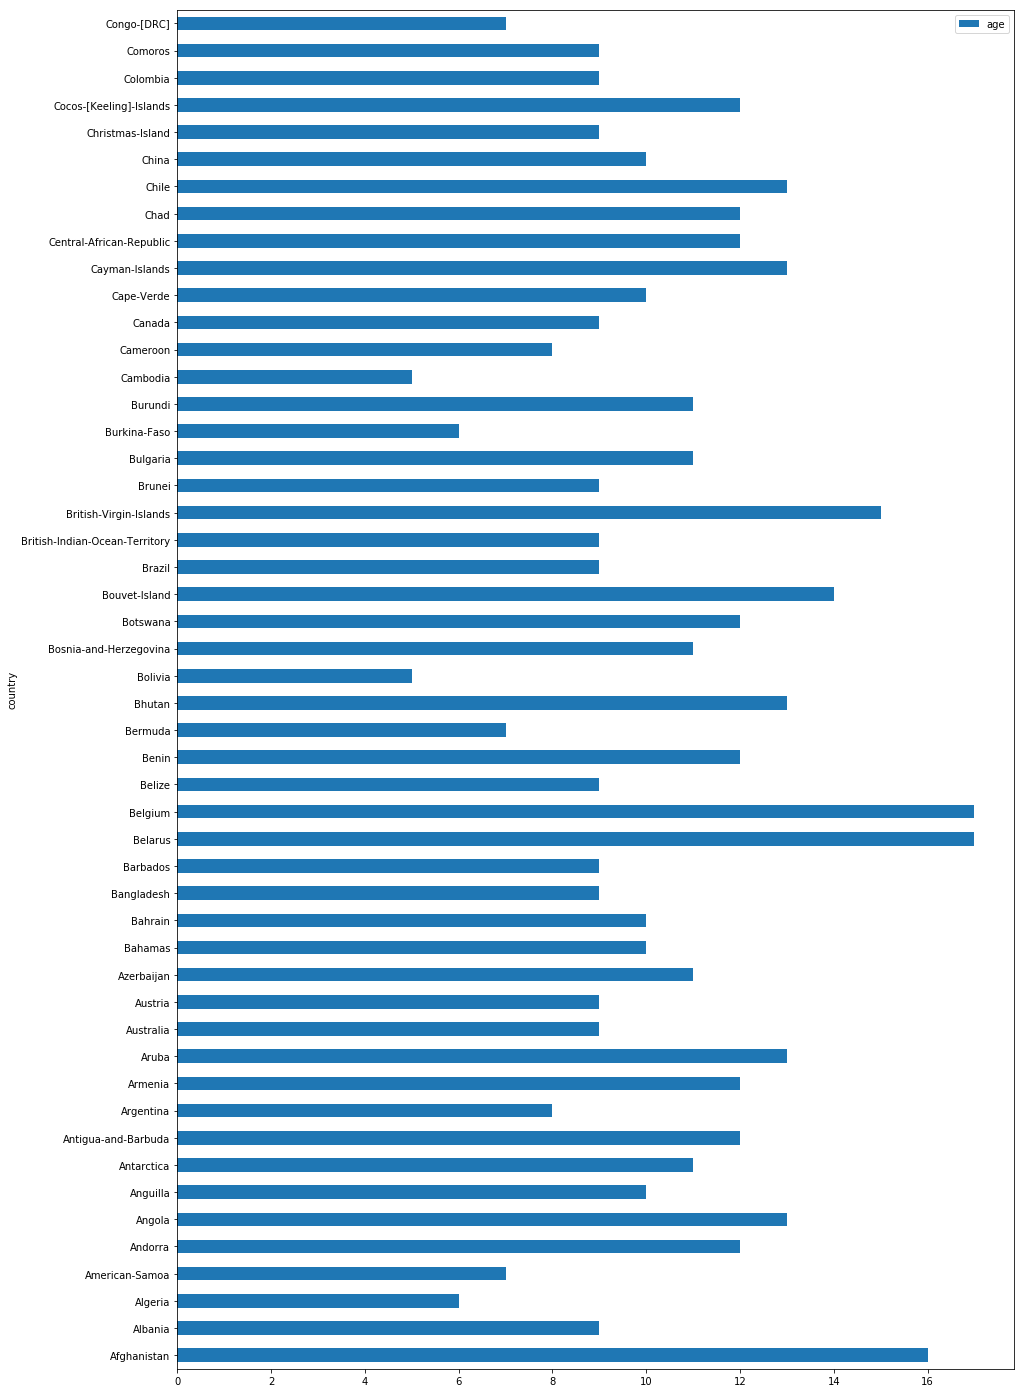

In [42]:
#Awesome function groupby ! Groups by country and counts age data. 
Country=WD.groupby('country').count()['age']
df=pd.DataFrame(Country)
df[0:50].plot.barh(figsize = [15,25])



<Figure size 1440x1584 with 0 Axes>

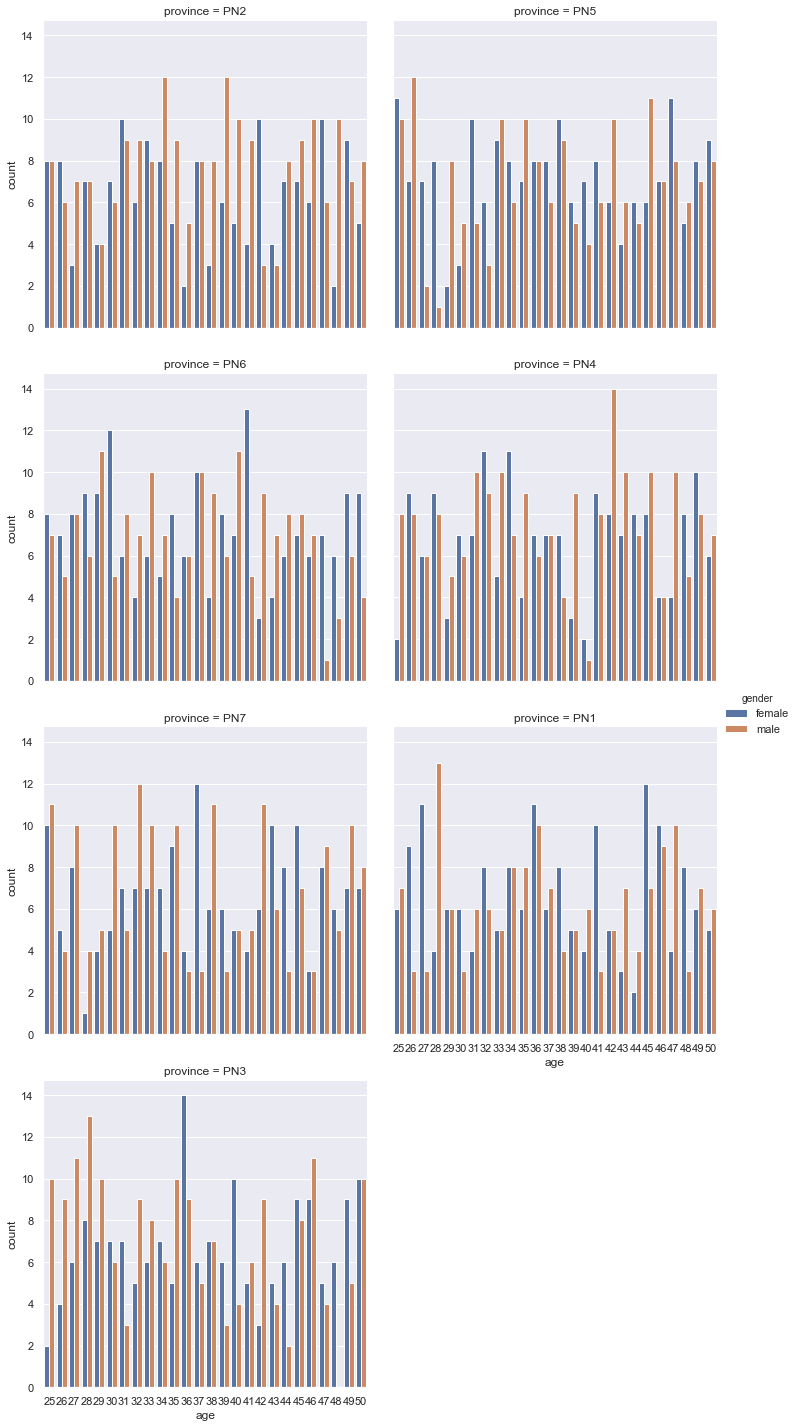

In [43]:
plt.figure(figsize = (20,22))
sns.set(color_codes=True)
sns.catplot("age", col="province", data=WD, 
               hue='gender',kind='count', col_wrap=2);

C:\Users\plasm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x1512 with 0 Axes>

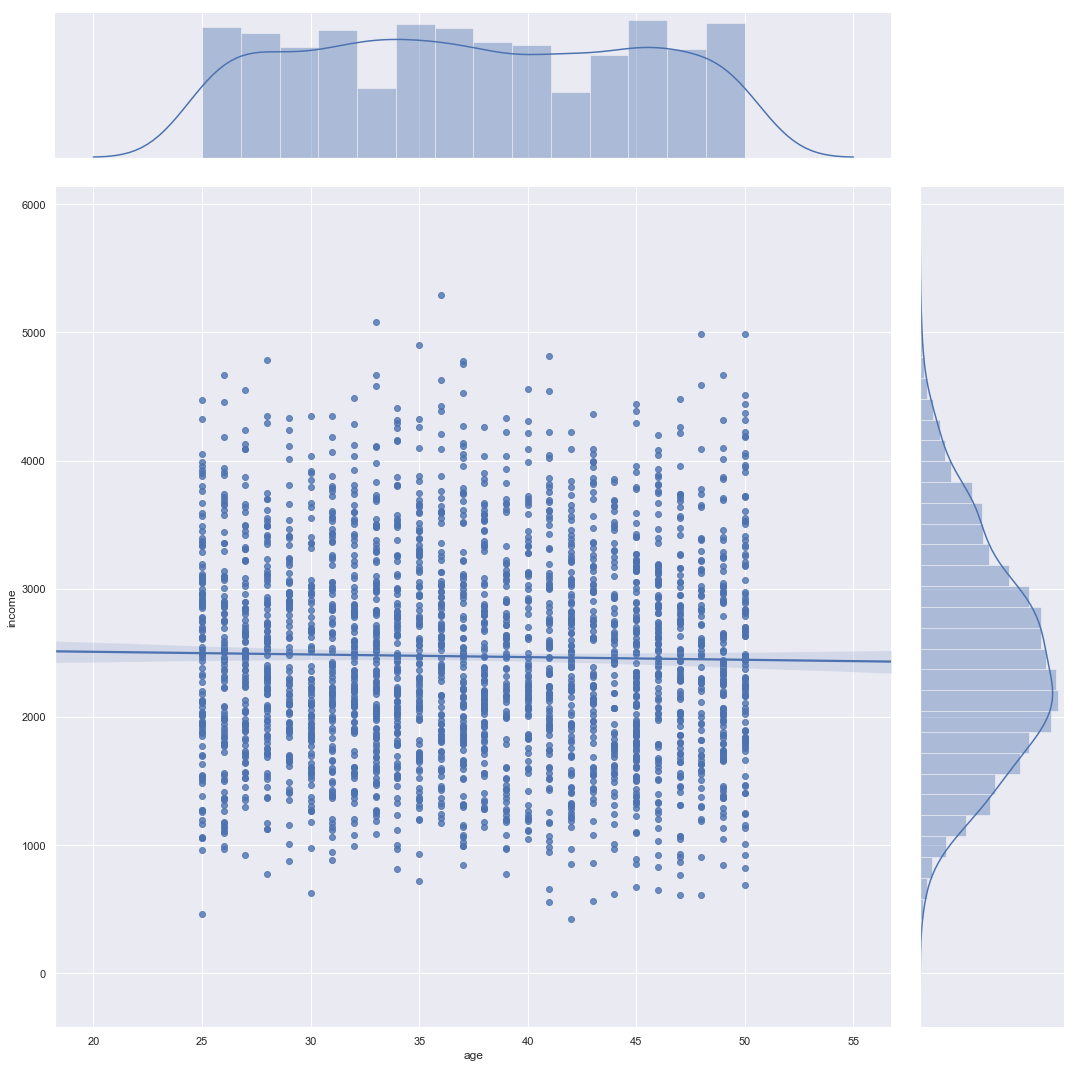

In [44]:

plt.figure(figsize = (15,21))
sns.jointplot(x="age", y="income", data=WD,height=15,kind ='reg');

<Figure size 1080x1584 with 0 Axes>

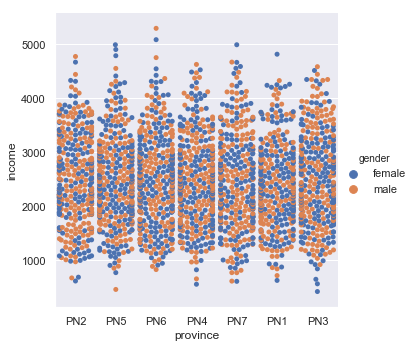

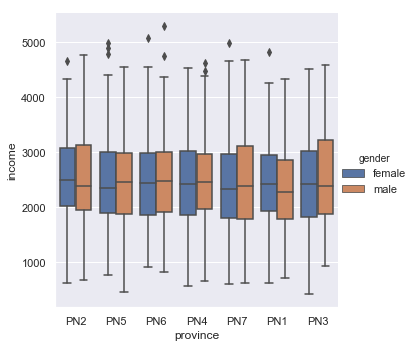

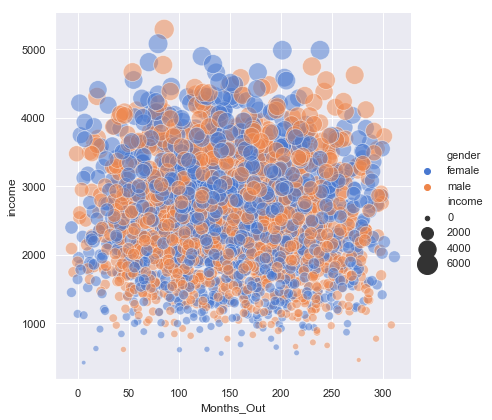

In [45]:
plt.figure(figsize=(15,22))
sns.catplot(x='province',y='income',kind='swarm',hue='gender',data=WD)
sns.catplot(x="province", y="income", kind="box", hue='gender',data=WD);
sns.relplot(x="Months_Out", y="income", hue="gender", size="income",
            sizes=(20, 400), alpha=.5, palette="muted",
            height=6, data=WD)

2019 2035


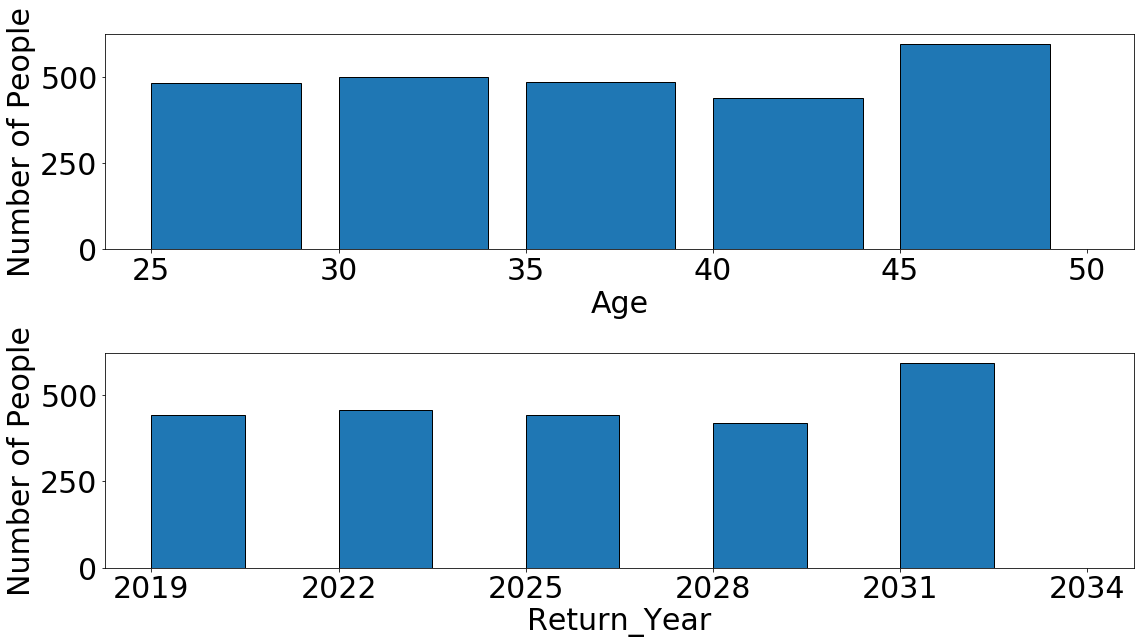

In [34]:
WD['Date_return']=pd.to_datetime(WD["Date_return"])
RY=WD['Date_return'].dt.year
RM=WD['Date_return'].dt.month
yearbin=histbin(min(RY),max(RY),3) #Creates bins for histogram
print (min(RY),max(RY))
##############
k=30 # Setting fontsize for entire plot
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(16,9))
ax0.tick_params(axis='both', which='major', labelsize=k)
bin1=[25,30,35,40,45,50]
ax0.hist(WD["age"], bins=bin1, edgecolor='k',width=4)
ax0.set_xticks(bin1)
ax0.set_xlabel("Age",fontsize=k)
ax0.set_ylabel("Number of People",fontsize=k)
'''Second plot'''
#bin2=[2019,2024,2029,2034,2039,2044,2049,2054]
ax1.tick_params(axis='both',which='major', labelsize=k)
ax1.hist(RY, bins=yearbin, edgecolor='k', width=1.5)
ax1.set_xticks(yearbin)
ax1.set_xlabel("Return_Year",fontsize=k)
ax1.set_ylabel("Number of People",fontsize=k)
fig.tight_layout()
fig.savefig('Bar.jpeg')
plt.show()

In [41]:
type(WD["Date_return"][0])


pandas._libs.tslibs.timestamps.Timestamp